### Setp 1 : Load the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "./DataSet/AirQualityUCI.xlsx"
df = pd.read_excel(file_path)

### Setp 2 : Basic Prepocess and Ready data set for further usecases 

#### Get basic Information

In [3]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


#### Find any Duplicated value in data

In [6]:
# Check for duplicate rows
print(df.duplicated().sum())

0


#### Visulize Data Set and do basic operation

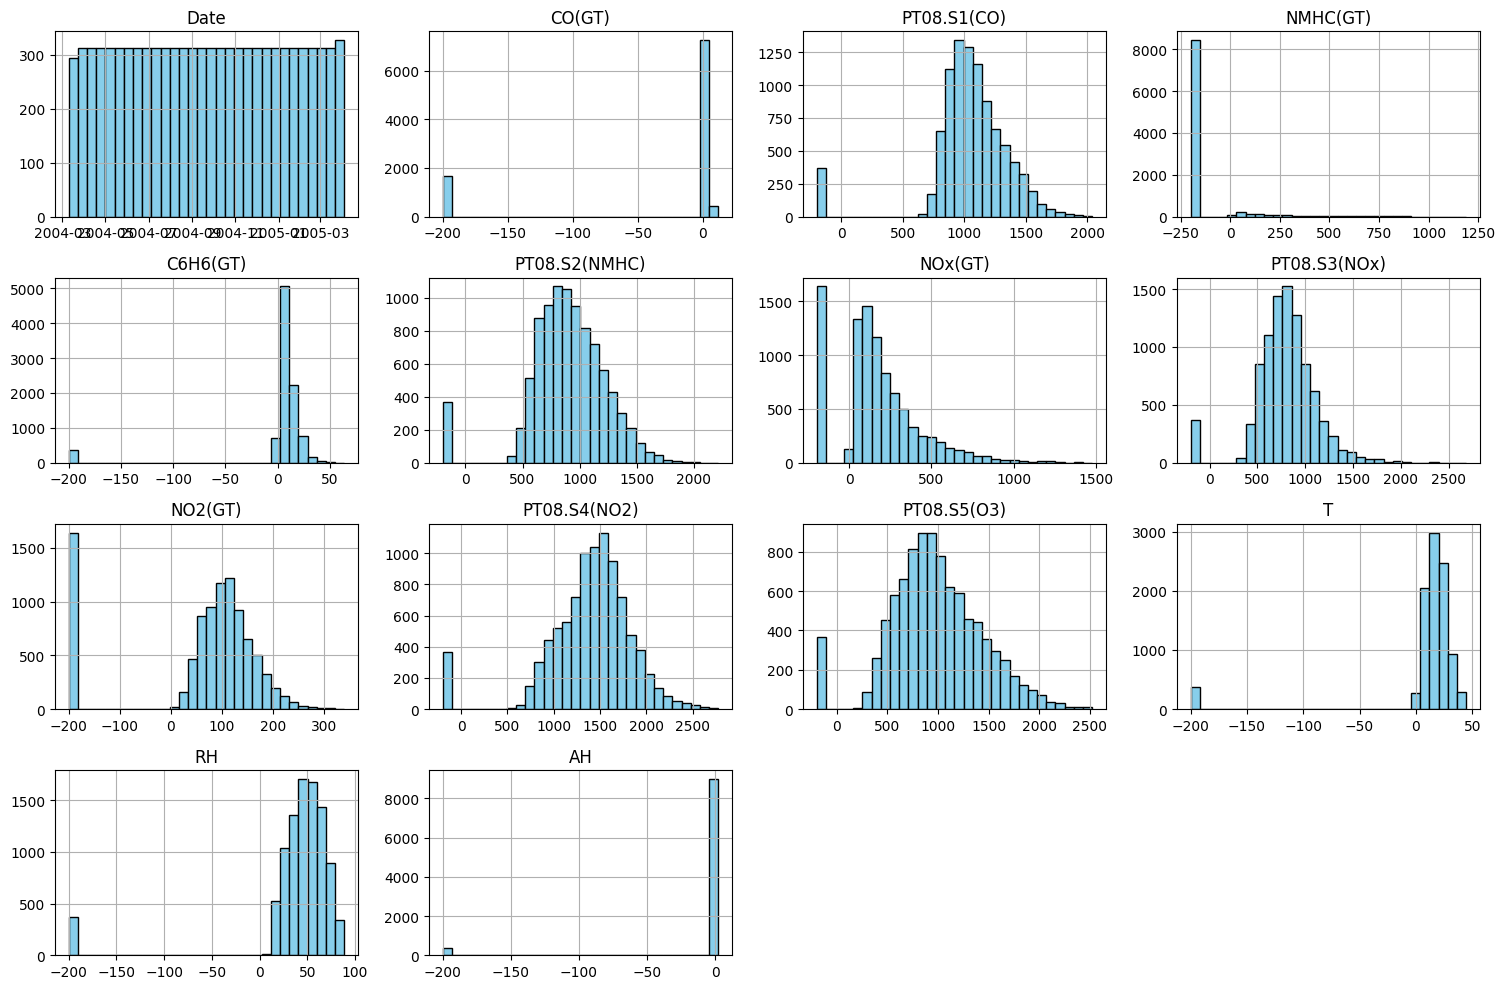

In [7]:
df.hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

<h4>
From the above whole process we can see, There are some Error values which is miss measured or faulty.  Value : -200.
So we have to handling those values rows  
</h4>

In [8]:
# handling a -200 values 
# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

print(df.isnull().sum())

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


We can see Column named NMHC(GT) have a arond 90% are values -200. So We have to remove this column from the our data set permanetly 

In [9]:
df = df.drop(columns=['NMHC(GT)']) 

we put median value for outher columns

In [10]:
df_numaric = df.drop(columns=['Date', 'Time'])
df_numaric.fillna(df_numaric.median(), inplace=True) 
df.update(df_numaric)


In [11]:
print(df.isna().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


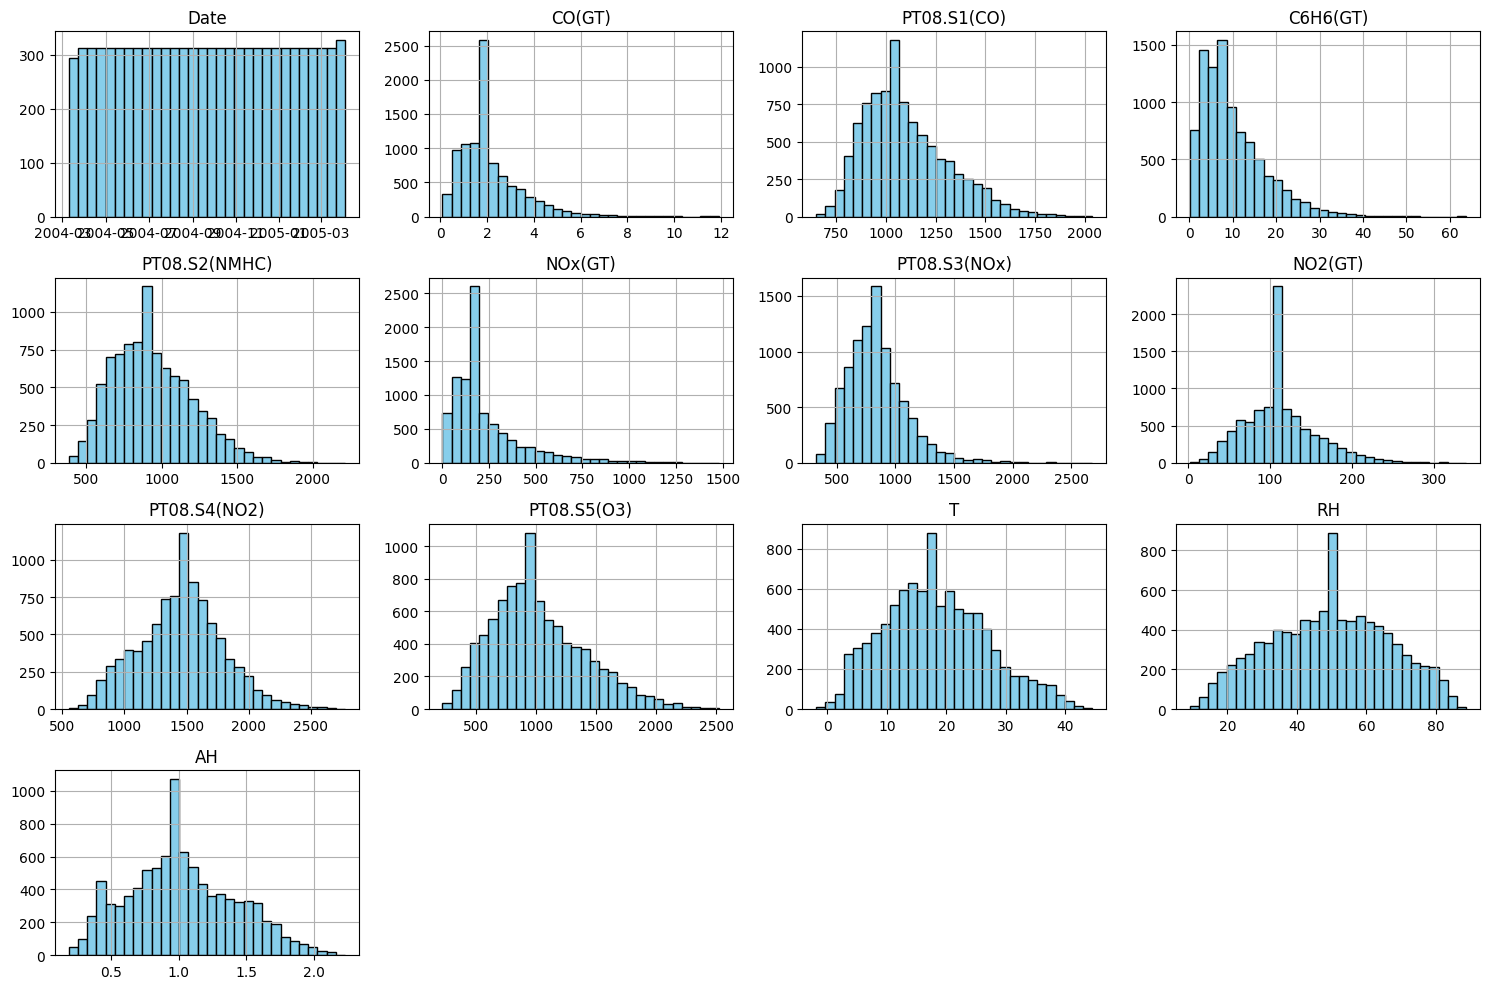

In [12]:
df.hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### Handling Date and Time Column

In [13]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [14]:
df["DateTime"] = df["Date"] + pd.to_timedelta(df["Time"].astype(str))

df.set_index("DateTime", inplace=True)

In [15]:
df.drop(columns=["Date", "Time"], inplace=True)

In [16]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


#### Develop Hour, Month, Dayofweek features for better analyses

C:\Users\Admin\AppData\Local\Temp\ipykernel_19672\3426339372.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="CO(GT)", data=df, ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19672\3426339372.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Dayofweek", y="CO(GT)", data=df, ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19672\3426339372.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Month", y="CO(GT)", data=df, ci=None)


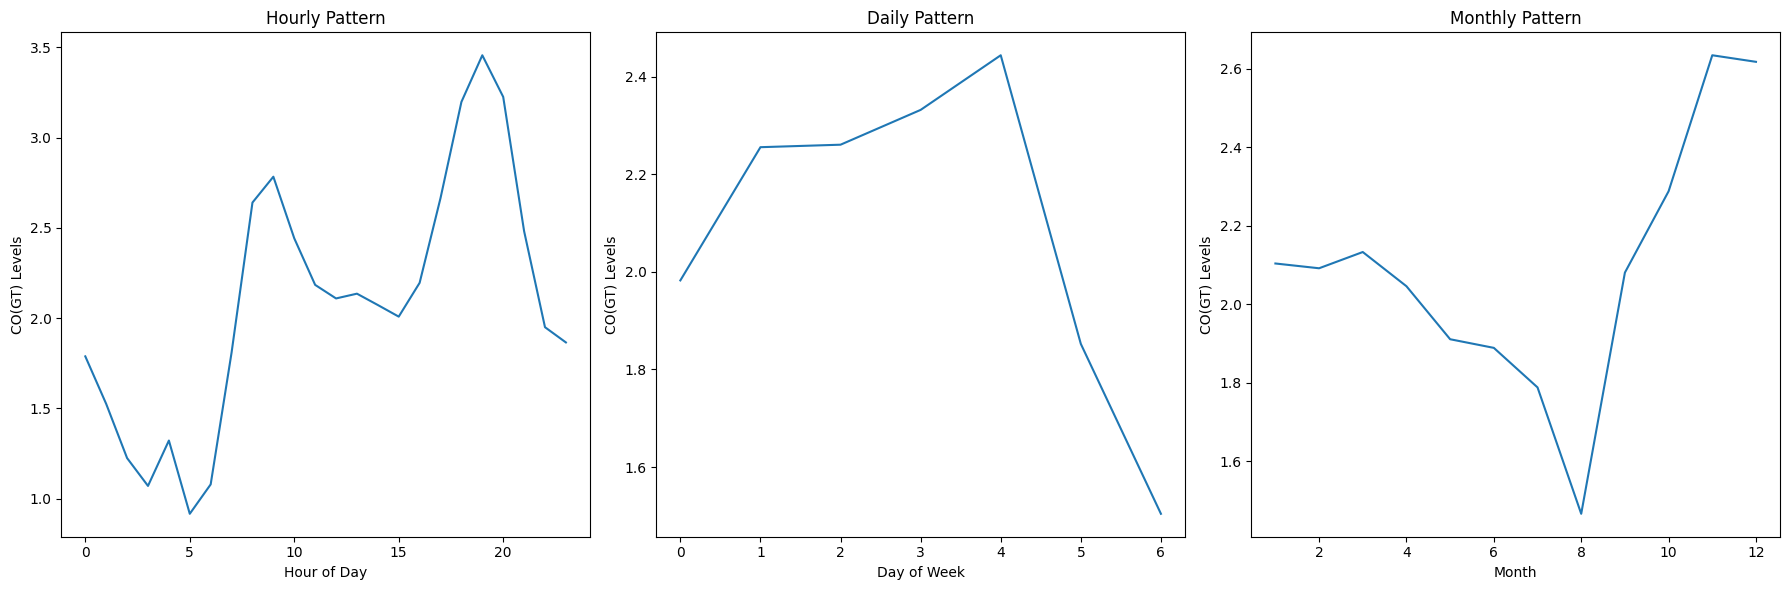

In [17]:
df["Month"] = df.index.month
df["Hour"] = df.index.hour
df["Dayofweek"] = df.index.dayofweek

plt.figure(figsize=(18, 6))

# Hourly pattern
plt.subplot(1, 3, 1)
sns.lineplot(x="Hour", y="CO(GT)", data=df, ci=None)
plt.xlabel("Hour of Day")
plt.ylabel("CO(GT) Levels")
plt.title("Hourly Pattern")

# Daily pattern
plt.subplot(1, 3, 2)
sns.lineplot(x="Dayofweek", y="CO(GT)", data=df, ci=None)
plt.xlabel("Day of Week")
plt.ylabel("CO(GT) Levels")
plt.title("Daily Pattern")

# Monthly pattern
plt.subplot(1, 3, 3)
sns.lineplot(x="Month", y="CO(GT)", data=df, ci=None)
plt.xlabel("Month")
plt.ylabel("CO(GT) Levels")
plt.title("Monthly Pattern")

plt.tight_layout()
plt.show()

from the above plots we can say our targeted feature CO is show a some pattern with time so we can use it for our model traning.

#### Develop Lag and Rolling features for model traning

In [18]:
# Create Lag Features (Previous CO(GT) Values)
df['CO_lag_1'] = df['CO(GT)'].shift(1)  # 1-step lag
df['CO_lag_2'] = df['CO(GT)'].shift(2)  # 2-step lag

In [19]:
# Create Rolling Features
df['CO_rolling_mean_3'] = df['CO(GT)'].rolling(window=3).mean()
df['CO_rolling_std_3'] = df['CO(GT)'].rolling(window=3).std()

In [20]:
df = df.dropna()

df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour,Dayofweek,CO_lag_1,CO_lag_2,CO_rolling_mean_3,CO_rolling_std_3
DateTime,,,,,,,,,,,,,,,,,,,
2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,3,20,2,2.0,2.6,2.266667,0.305505
2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,3,21,2,2.2,2.0,2.133333,0.115470
2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,3,22,2,2.2,2.2,2.000000,0.346410
2004-03-10 23:00:00,1.2,1197.00,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772,3,23,2,1.6,2.2,1.666667,0.503322
2004-03-11 00:00:00,1.2,1185.00,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312,3,0,3,1.2,1.6,1.333333,0.230940


### Setp 3 : Handling Outliers 

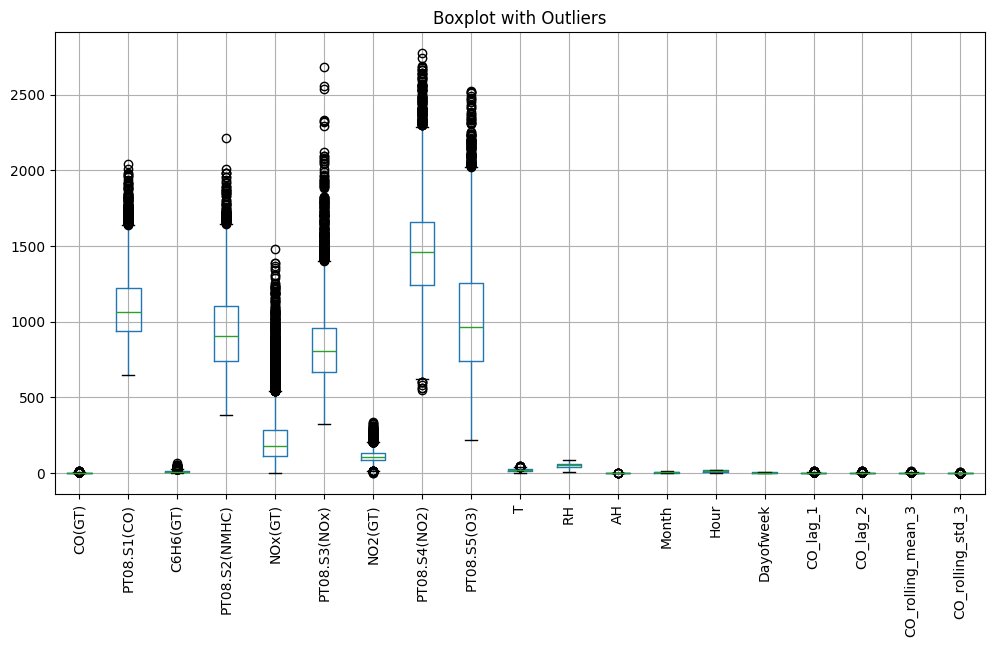

In [21]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Boxplot with Outliers")
plt.show()

In [22]:
# now remove a outliers from this data

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_cleaned.shape)
print(df.shape)

(7590, 19)
(9355, 19)


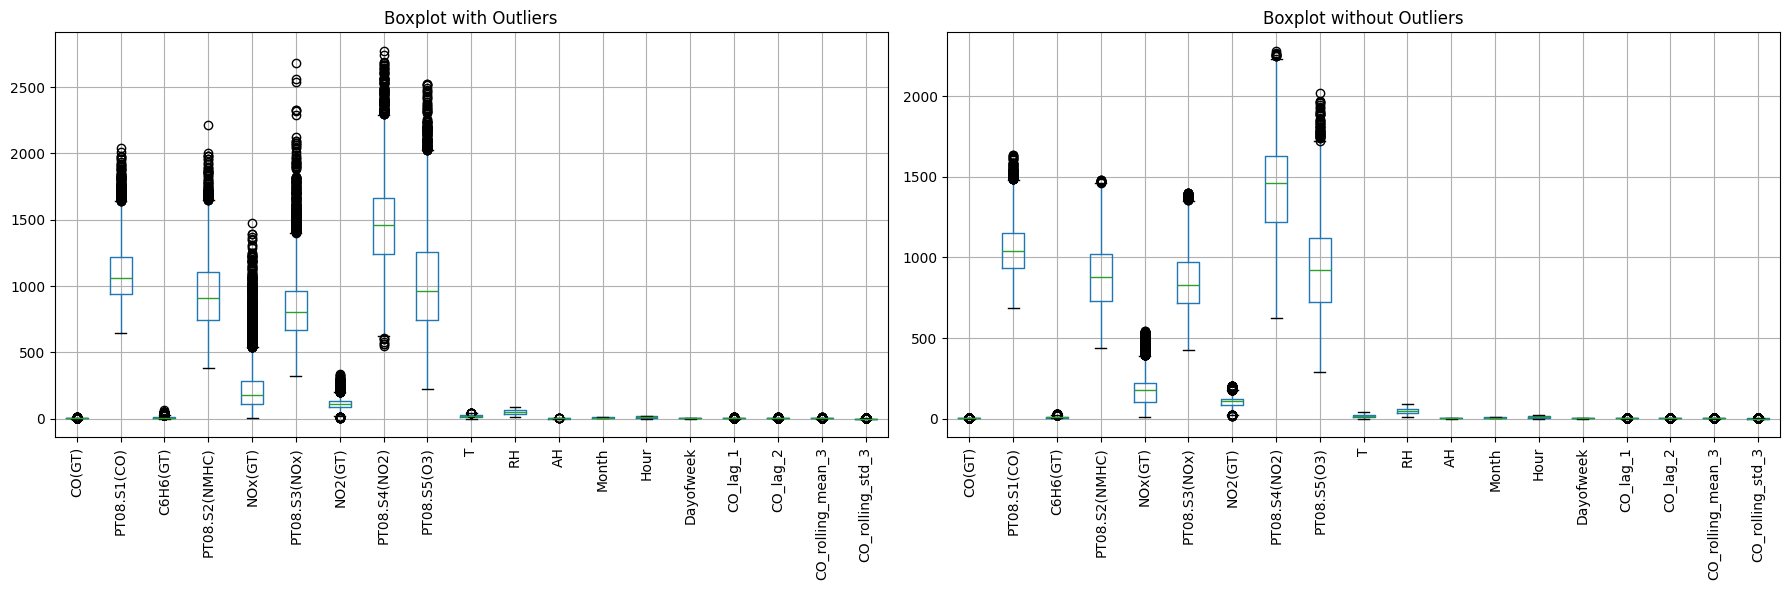

In [23]:
plt.figure(figsize=(18, 6))

# Boxplot with outliers
plt.subplot(1, 2, 1)
df.boxplot(rot=90)
plt.title("Boxplot with Outliers")

# Boxplot without outliers
plt.subplot(1, 2, 2)
df_cleaned.boxplot(rot=90)
plt.title("Boxplot without Outliers")

plt.tight_layout()
plt.show()

In [24]:
df = df_cleaned.copy()

### Step 4 : Feature Selection

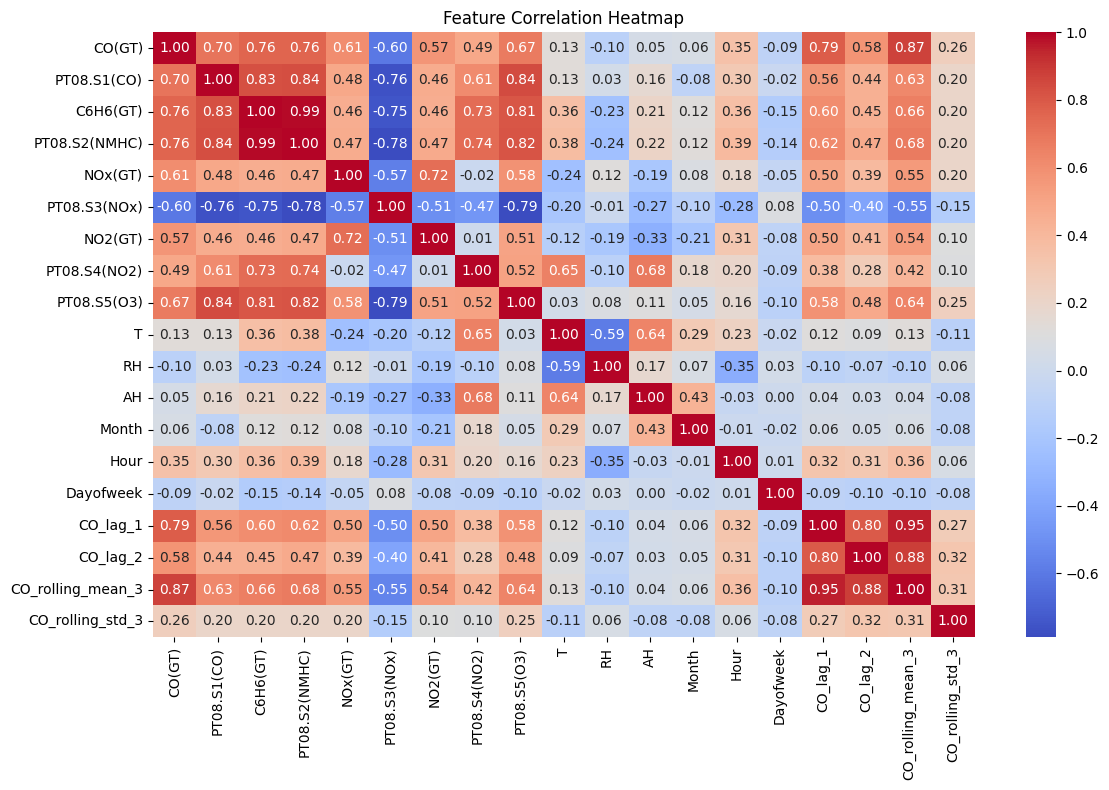

In [25]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

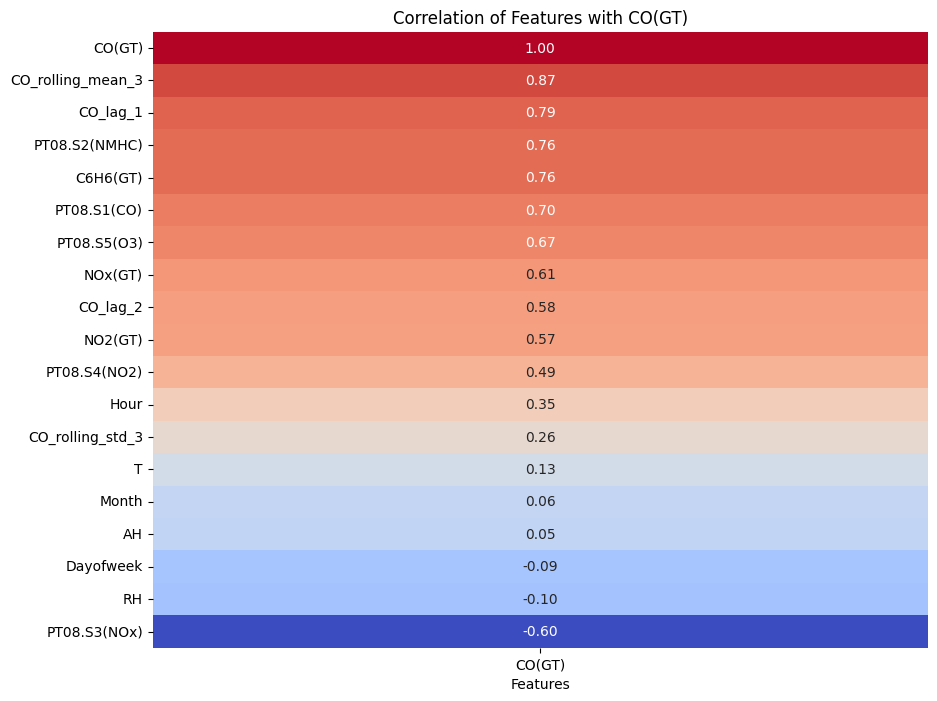

CO(GT)               1.000000
CO_rolling_mean_3    0.867848
CO_lag_1             0.787167
PT08.S2(NMHC)        0.761144
C6H6(GT)             0.758219
PT08.S1(CO)          0.704995
PT08.S5(O3)          0.672979
NOx(GT)              0.607066
CO_lag_2             0.578319
NO2(GT)              0.571920
PT08.S4(NO2)         0.487549
Hour                 0.345413
CO_rolling_std_3     0.255280
T                    0.131150
Month                0.058350
AH                   0.045044
Dayofweek           -0.087089
RH                  -0.101078
PT08.S3(NOx)        -0.604166
Name: CO(GT), dtype: float64


In [26]:
# Extract correlation of CO(GT) with other features
co_corr = corr_matrix["CO(GT)"].sort_values(ascending=False)

# Plot heatmap for CO(GT) correlations
plt.figure(figsize=(10, 8))
sns.heatmap(co_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation of Features with CO(GT)")
plt.xlabel("Features")
plt.show()
print(co_corr)

In [27]:
selected_features = [
    'CO_rolling_mean_3',
    'CO_lag_1',
    'C6H6(GT)',
    'PT08.S2(NMHC)',
    'NOx(GT)',
    'PT08.S1(CO)',
    'PT08.S5(O3)',
    'NO2(GT)',
    'CO_lag_2',
    'PT08.S4(NO2)',
    'CO_rolling_std_3',
    'Hour',
]

X = df[selected_features]
y = df['CO(GT)']

### Step 5 : Do MinMax Scalling for Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
target = y 
features = X  

In [31]:
features_normalized = scaler.fit_transform(features)

# Convert to DataFrame for easier handling
features_normalized = pd.DataFrame(features_normalized, columns=features.columns, index=features.index)

features_normalized.head()


,CO_rolling_mean_3,CO_lag_1,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S1(CO),PT08.S5(O3),NO2(GT),CO_lag_2,PT08.S4(NO2),CO_rolling_std_3,Hour
DateTime,,,,,,,,,,,,
2004-03-10 20:00:00,0.492424,0.413043,0.319110,0.478657,0.227444,0.754791,0.453628,0.522110,0.543478,0.561607,0.207231,0.869565
2004-03-10 21:00:00,0.462121,0.456522,0.327772,0.487290,0.304511,0.726962,0.528198,0.564731,0.413043,0.579209,0.078326,0.913043
2004-03-10 22:00:00,0.431818,0.456522,0.226126,0.379137,0.227444,0.618535,0.474398,0.532765,0.456522,0.522792,0.234978,0.956522
2004-03-10 23:00:00,0.356061,0.326087,0.159482,0.297362,0.148496,0.539512,0.381653,0.426212,0.456522,0.464420,0.341415,1.000000
2004-03-11 08:00:00,0.265152,0.217391,0.282209,0.440767,0.308271,0.682594,0.469494,0.511454,0.130435,0.539040,0.451650,0.347826


### Step 6 : Split Data Set for Training and Testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (6072, 12), Testing Set: (1518, 12)


### Step 7 : Selecting a Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Linear Regression

In [35]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MAE: 3.5620313608385274e-14
MSE: 2.0068052307642875e-27
R² Score: 1.0


#### Decision Tree Regressor

In [36]:
dt = DecisionTreeRegressor(max_depth=5)  # Control depth to avoid overfitting
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Decision Tree R² Score:", dt.score(X_test, y_test))

Decision Tree Results:
MAE: 0.21397537346256926
MSE: 0.09800100843829704
Decision Tree R² Score: 0.8590282819296765


#### Random Forest Regression

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Random Forest R² Score:", rf.score(X_test, y_test))

Random Forest Results:
MAE: 0.08393675889328099
MSE: 0.023334075098814227
Random Forest R² Score: 0.9664345835958119


#### From the Results, chose Random Forest Regressor Model

### Step 8 : Optimize model with Hyperparameter Tuning for Random Forest 

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [40]:
# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
# Train final model with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate model
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Model R² Score: {r2}")
print(f"Final Model RMSE: {rmse}")

Final Model R² Score: 0.9674055645463262
Final Model RMSE: 0.1505292880732229


In [42]:
y_pred = best_rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", best_rf.score(X_test, y_test))

MAE: 0.08281854265588677
MSE: 0.022659066567831333
RMSE: 0.1505292880732229
R² Score: 0.9674055645463262


### Final Step : Save Model for Reuse

In [43]:
import joblib

In [44]:
# Save model
joblib.dump(best_rf, 'CO_Prediction_Model.pkl')

['CO_Prediction_Model.pkl']

In [45]:
loaded_model = joblib.load('CO_Prediction_Model.pkl')

#### Testing model 

In [46]:
sample_data = pd.DataFrame({
    'CO_rolling_mean_3': [2.266667],
    'CO_lag_1': [2.0],
    'C6H6(GT)': [8.997817],
    'PT08.S2(NMHC)': [939.25],
    'NOx(GT)': [131.0],
    'PT08.S1(CO)': [1402.00],
    'PT08.S5(O3)': [1074.00],
    'NO2(GT)': [114.0],
    'CO_lag_2': [2.6],
    'PT08.S4(NO2)': [1554.50],
    'CO_rolling_std_3': [.305505],
    'Hour': [20],
})

In [47]:
sample_prediction = loaded_model.predict(sample_data)
print(f"Predicted CO(GT) for sample data: {sample_prediction[0]:.2f}")

Predicted CO(GT) for sample data: 2.13


In [51]:
X.head(1)

,CO_rolling_mean_3,CO_lag_1,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S1(CO),PT08.S5(O3),NO2(GT),CO_lag_2,PT08.S4(NO2),CO_rolling_std_3,Hour
DateTime,,,,,,,,,,,,
2004-03-10 20:00:00,2.266667,2.0,8.997817,939.25,131.0,1402.0,1074.0,114.0,2.6,1554.5,0.305505,20


In [52]:
y.head(1)

DateTime
2004-03-10 20:00:00    2.2
Name: CO(GT), dtype: float64